In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

In [ ]:
# Set up database connection information
user = 'root'  # MySQL username
password = '123'  # MySQL password
host = '127.0.0.1'  # Hostname (default: localhost)
port = 3306  # MySQL port (default: 3306)
database = 'project_db'  # Change to the correct database name

In [8]:
# Create an engine for the database connection
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}")

In [9]:
# Regular Gas Data
query_regular = "SELECT * FROM regular_gas_prices_canada;"
df_regular = pd.read_sql(query_regular, engine)

In [11]:
# Premium Gas Data
query_premium = "SELECT * FROM premium_gas_prices_canada;"
df_premium = pd.read_sql(query_premium, engine)

In [12]:
# Diesel Data
query_diesel = "SELECT * FROM diesel_prices_canada;"
df_diesel = pd.read_sql(query_diesel, engine)

In [14]:
# Add a column for fuel type
df_regular["fuel_type"] = "Regular"
df_premium["fuel_type"] = "Premium"
df_diesel["fuel_type"] = "Diesel"

In [16]:
# Combine all data into a single DataFrame
df_all = pd.concat([df_regular, df_premium, df_diesel], ignore_index=True)

In [17]:
# Combine all dataframes into one
df_combined = pd.concat([df_regular, df_premium, df_diesel], ignore_index=True)

In [18]:
# Check combined data
print(df_combined.head())

   id  region    month  price fuel_type
0   1  Canada  2023-10  157.4   Regular
1   2  Canada  2023-11  152.2   Regular
2   3  Canada  2023-12  145.4   Regular
3   4  Canada  2024-01  144.1   Regular
4   5  Canada  2024-02  149.9   Regular


In [ ]:
# Group by fuel type and compute statistical measures
print("Basic Statistics for All Fuel Types:")
print(df_combined.groupby("fuel_type")["price"].agg(["mean", "median", "min", "max", "std"]))

Basic Statistics for All Fuel Types:
                 mean  median    min    max        std
fuel_type                                             
Diesel     176.982353  177.70  147.3  211.7  15.169548
Premium    182.034188  181.25  141.5  234.8  15.769537
Regular    160.784615  161.30  117.4  210.2  16.135685


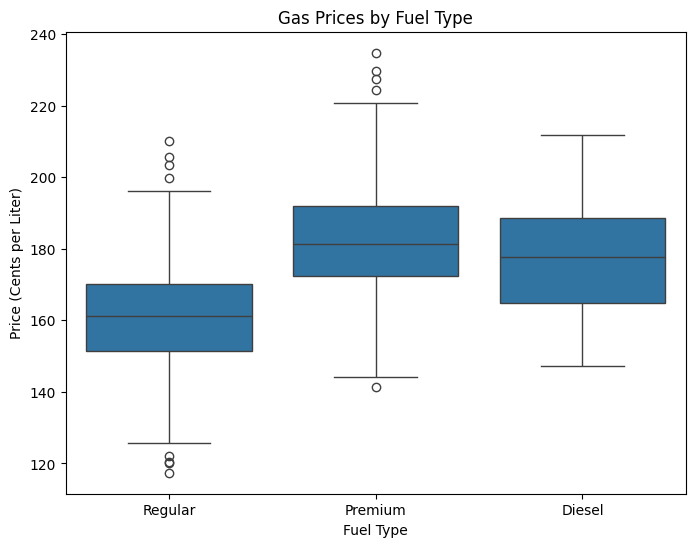

In [ ]:
# Boxplot to compare prices across fuel types
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_combined, x="fuel_type", y="price")
plt.title("Gas Prices by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Price (Cents per Liter)")
plt.show()

In [ ]:
# Group data by region and fuel type, and calculate the mean price
region_avg_prices = df_combined.groupby(["region", "fuel_type"])["price"].mean().reset_index()
print("Average Prices by Region and Fuel Type:")
print(region_avg_prices)

Average Prices by Region and Fuel Type:
                                               region fuel_type       price
0                                    Calgary, Alberta    Diesel  162.176923
1                                    Calgary, Alberta   Premium  168.546154
2                                    Calgary, Alberta   Regular  143.661538
3                                              Canada   Regular  156.661538
4   Charlottetown and Summerside, Prince Edward Is...    Diesel  188.830769
5   Charlottetown and Summerside, Prince Edward Is...   Premium  177.607692
6   Charlottetown and Summerside, Prince Edward Is...   Regular  166.423077
7                                   Edmonton, Alberta    Diesel  158.253846
8                                   Edmonton, Alberta   Premium  166.038462
9                                   Edmonton, Alberta   Regular  140.561538
10                               Halifax, Nova Scotia    Diesel  184.176923
11                               Halifax, Nova S

In [ ]:
# Heatmap to show average prices by region and fuel type
pivot_table = region_avg_prices.pivot(index="region", columns="fuel_type", values="price")


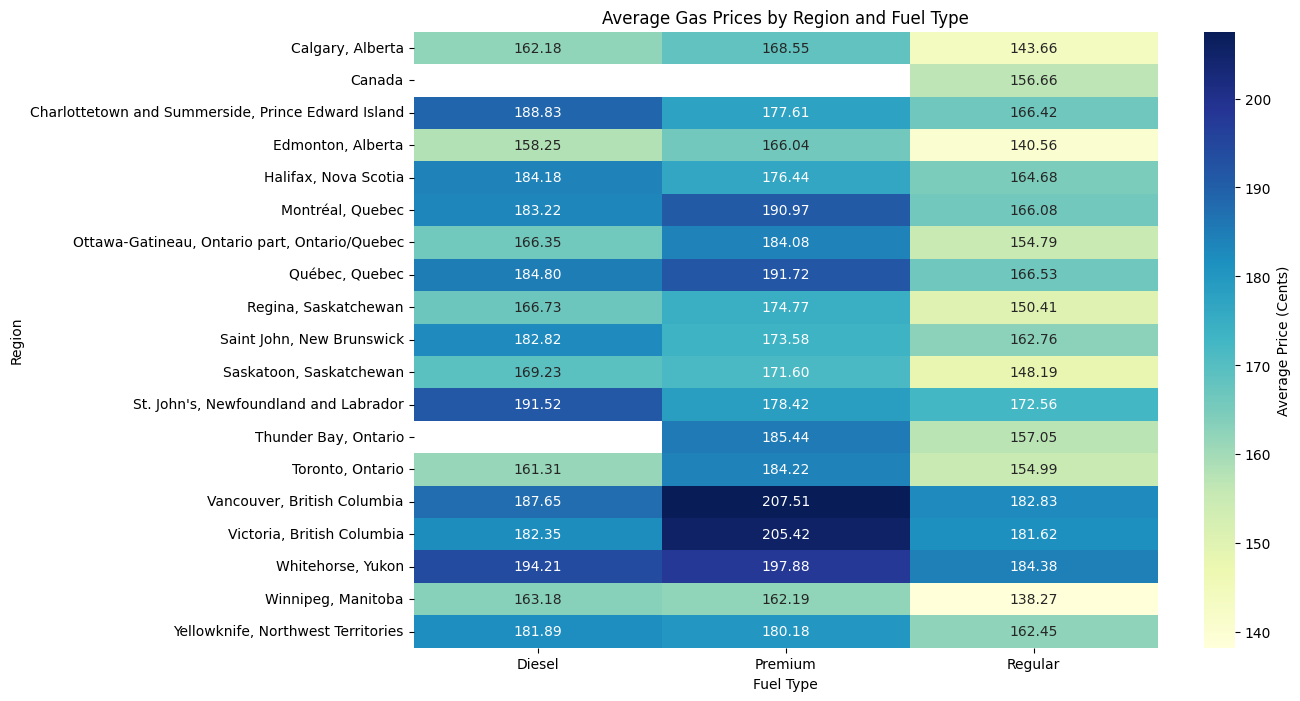

In [28]:
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Average Price (Cents)'})
plt.title("Average Gas Prices by Region and Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Region")
plt.show()

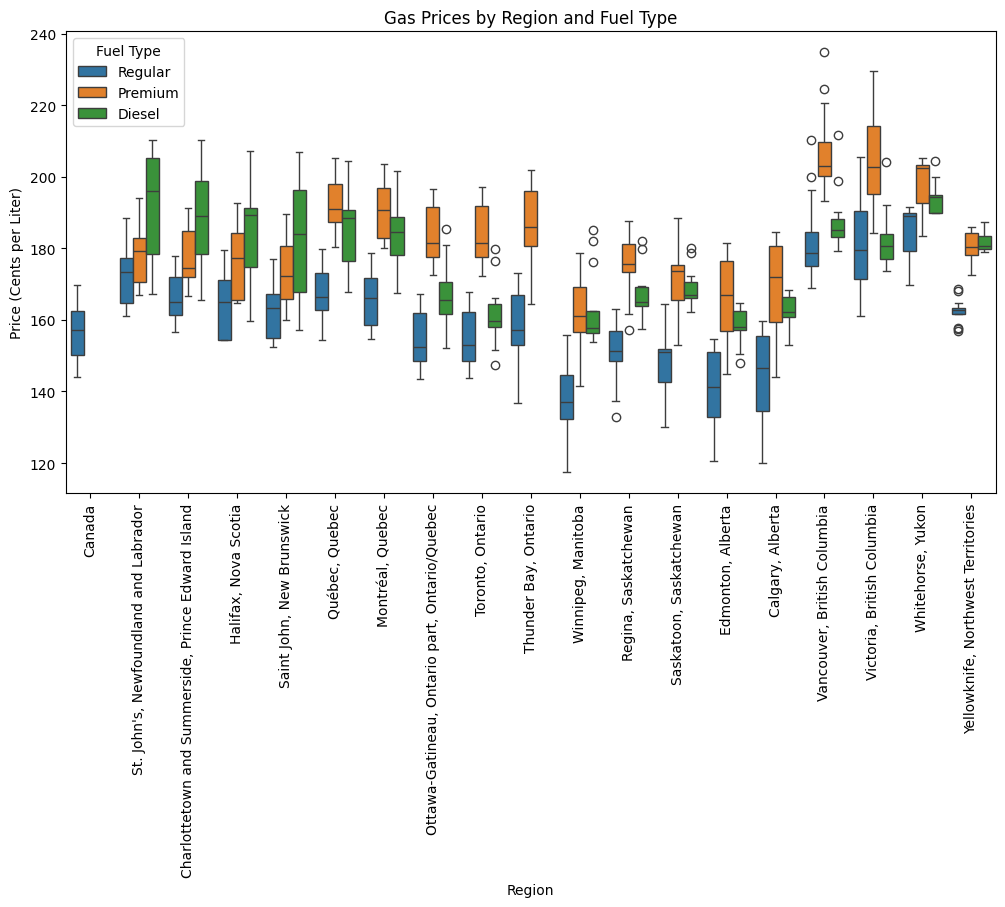

In [ ]:
# Boxplot to compare prices across regions for different fuel types
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_combined, x="region", y="price", hue="fuel_type")
plt.xticks(rotation=90)
plt.title("Gas Prices by Region and Fuel Type")
plt.xlabel("Region")
plt.ylabel("Price (Cents per Liter)")
plt.legend(title="Fuel Type")
plt.show()